In [937]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

<!-- Collecting Data -->

In [938]:
tableSalary = pd.read_csv('salary.csv', sep='|')

In [939]:
tableSalary.head(5)

,id,job_title,location,salary_currency,career_level,experience_level,education_level,employment_type,job_function,job_benefits,company_process_time,company_size,company_industry,job_description,salary
0,1,Facility Maintenance & Smart Warehouse Manager,Bandung,IDR,Manajer/Asisten Manajer,5 tahun,"Sertifikat Professional, D3 (Diploma), D4 (Dip...",Penuh Waktu,"Manufaktur,Pemeliharaan",NaN,NaN,NaN,NaN,Deskripsi PekerjaanRequirements :D3/SI from re...,NaN
1,2,Procurement Department Head,Jakarta Raya,IDR,Manajer/Asisten Manajer,5 tahun,"Sarjana (S1), Diploma Pascasarjana, Gelar Prof...",Penuh Waktu,"Manufaktur,Pembelian/Manajemen Material",NaN,25 days,51 - 200 pekerja,Manajemen/Konsulting HR,Job Role: 1. Responsible for material availabi...,NaN
2,3,SALES ADMIN,Jakarta Barat,IDR,Supervisor/Koordinator,4 tahun,Sarjana (S1),Penuh Waktu,"Penjualan / Pemasaran,Penjualan Ritel","Waktu regular, Senin - Jumat;Bisnis (contoh: K...",30 days,51 - 200 pekerja,Umum & Grosir,Internal Sales & AdminJob Description :We are ...,NaN
3,4,City Operation Lead Shopee Express (Cirebon),Cirebon,IDR,Supervisor/Koordinator,5 tahun,"Sarjana (S1), Diploma Pascasarjana, Gelar Prof...",Penuh Waktu,"Pelayanan,Logistik/Rantai Pasokan","Tip;Waktu regular, Senin - Jumat;Kasual (conto...",21 days,2001 - 5000 pekerja,Retail/Merchandise,Job Description:Responsible for HSE implementa...,NaN
4,5,Japanese Interpreter,Bekasi,IDR,Pegawai (non-manajemen & non-supervisor),2 tahun,"Sertifikat Professional, D3 (Diploma), D4 (Dip...",Penuh Waktu,"Lainnya,Jurnalis/Editor",NaN,23 days,201 - 500 pekerja,Manajemen/Konsulting HR,Overview: Our clients is manufacture for autom...,NaN


In [940]:
tableSalary.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34746 entries, 0 to 34745
Data columns (total 15 columns):
id                      34746 non-null int64
job_title               34746 non-null object
location                34746 non-null object
salary_currency         34742 non-null object
career_level            34746 non-null object
experience_level        30205 non-null object
education_level         34746 non-null object
employment_type         33402 non-null object
job_function            34746 non-null object
job_benefits            27330 non-null object
company_process_time    24555 non-null object
company_size            29103 non-null object
company_industry        33132 non-null object
job_description         34745 non-null object
salary                  9352 non-null float64
dtypes: float64(1), int64(1), object(13)
memory usage: 4.0+ MB


<!-- Cleaning Data -->

In [941]:
objectType = tableSalary.select_dtypes('object').columns
objectType

Index(['job_title', 'location', 'salary_currency', 'career_level',
       'experience_level', 'education_level', 'employment_type',
       'job_function', 'job_benefits', 'company_process_time', 'company_size',
       'company_industry', 'job_description'],
      dtype='object')

In [942]:
numericType = tableSalary.select_dtypes('number').columns
numericType

Index(['id', 'salary'], dtype='object')

In [943]:
tableSalary.isnull().sum()

id                          0
job_title                   0
location                    0
salary_currency             4
career_level                0
experience_level         4541
education_level             0
employment_type          1344
job_function                0
job_benefits             7416
company_process_time    10191
company_size             5643
company_industry         1614
job_description             1
salary                  25394
dtype: int64

In [944]:
tableSalary.dropna(subset=["salary"], inplace=True)
# tableSalary["salary"] = tableSalary["salary"].fillna(0).astype('int')
tableSalary.isnull().sum()

id                         0
job_title                  0
location                   0
salary_currency            0
career_level               0
experience_level         782
education_level            0
employment_type            0
job_function               0
job_benefits            2282
company_process_time    3195
company_size            1424
company_industry         292
job_description            0
salary                     0
dtype: int64

In [945]:
generalNumeric = tableSalary[numericType].describe()
generalNumeric

,id,salary
count,9352.000000,9.352000e+03
mean,21445.615483,7.358879e+06
std,11107.218801,2.148128e+07
min,6.000000,1.000000e+01
25%,11865.750000,4.250000e+06
50%,23332.500000,5.500000e+06
75%,32408.250000,8.000000e+06
max,34746.000000,2.000000e+09


<!-- Analizing Data -->

In [946]:
# Top 10 Region (highest average salary)
topRegion = tableSalary.loc[:, ['location', 'salary']]
topRegion.sort_values("location", inplace=True)

topRegion.groupby("location")["salary"].mean().round(0).nlargest(10)

location
Ubud              33125000.0
Manokwari         21375000.0
Demak             18000000.0
Kapuas            18000000.0
Kutai Barat       16500000.0
Sulawesi Utara    12662500.0
Klungkung         12283333.0
Citeureup         12016667.0
Kotabaru          12000000.0
Banjar            11250000.0
Name: salary, dtype: float64

In [947]:
# Simple Linear regression (predict the salary based on experience)

# Add column year experience based on column experience_level
tableSalary["years_experience"] = tableSalary["experience_level"]
tableSalary["years_experience"] = tableSalary["years_experience"].str.replace("\D", "").fillna(0).astype('int')
# tableSalary["years_experience"]

In [948]:
X = tableSalary.loc[:, ["years_experience"]].values
y = tableSalary.loc[:, ["salary"]].values

In [949]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 1/2, random_state = 0)

model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)


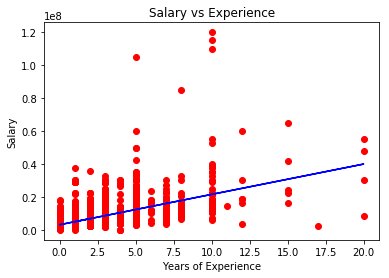

In [950]:
plt.scatter(X_train, y_train, color = 'red')
plt.plot(X_train, model.predict(X_train), color = 'blue')
plt.title('Salary vs Experience')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.show()